<a href="https://colab.research.google.com/github/y-patankar/StockMarket/blob/main/Costo_Random_Data(2_days)(next_day).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import BDay
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('COST_Shuffled(2 days).csv')

In [ ]:
df.set_index('Date', drop=False, inplace=True)
df

,Unnamed: 0,Date,Open,High,Low,Close,date-1,open-1,high-1,low-1,close-1,date-2,open-2,high-2,low-2,close-2,close-7day,close-14day
Date,,,,,,,,,,,,,,,,,,
2004-05-20,0,2004-05-20,36.520000,36.730000,36.310001,36.689999,2004-05-19,36.799999,37.049999,36.450001,36.520000,2004-05-18,35.869999,36.959999,35.770000,36.389999,36.119999,37.500000
2023-02-01,1,2023-02-01,508.309998,520.450012,504.720001,517.909973,2023-01-31,503.230011,511.410004,502.000000,511.140015,2023-01-30,500.369995,505.600006,500.369995,503.279999,492.609985,484.309998
2003-01-29,2,2003-01-29,29.040001,29.400000,28.360001,29.320000,2003-01-28,28.900000,29.330000,28.850000,29.209999,2003-01-27,28.680000,29.559999,28.559999,28.770000,30.070000,29.299999
2004-09-28,3,2004-09-28,41.470001,41.549999,41.139999,41.299999,2004-09-27,41.169998,41.660000,41.110001,41.200001,2004-09-24,40.700001,41.680000,40.580002,41.349998,41.259998,40.119999
2008-08-28,4,2008-08-28,66.860001,67.930000,66.839996,67.809998,2008-08-27,66.349998,67.169998,65.870003,66.709999,2008-08-26,66.419998,66.730003,65.599998,66.519997,66.459999,66.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-18,5659,2008-03-18,61.220001,61.750000,60.009998,61.669998,2008-03-17,60.400002,60.889999,59.660000,60.360001,2008-03-14,62.580002,62.849998,60.090000,60.860001,60.299999,64.489998
2009-03-10,5660,2009-03-10,39.029999,40.189999,38.650002,40.139999,2009-03-09,38.439999,39.470001,38.180000,38.439999,2009-03-06,39.580002,39.740002,38.169998,38.980000,42.340000,42.380001
2023-02-14,5661,2023-02-14,505.010010,507.850006,498.630005,503.220001,2023-02-13,501.739990,506.790009,501.350006,506.450012,2023-02-10,498.510010,500.549988,495.380005,499.989990,514.799988,490.880005


In [ ]:
df = df[['Open','Close','open-1', 'high-1','low-1','close-1','close-7day','close-14day']]
df

,Open,Close,open-1,high-1,low-1,close-1,close-7day,close-14day
Date,,,,,,,,
2004-05-20,36.520000,36.689999,36.799999,37.049999,36.450001,36.520000,36.119999,37.500000
2023-02-01,508.309998,517.909973,503.230011,511.410004,502.000000,511.140015,492.609985,484.309998
2003-01-29,29.040001,29.320000,28.900000,29.330000,28.850000,29.209999,30.070000,29.299999
2004-09-28,41.470001,41.299999,41.169998,41.660000,41.110001,41.200001,41.259998,40.119999
2008-08-28,66.860001,67.809998,66.349998,67.169998,65.870003,66.709999,66.459999,66.989998
...,...,...,...,...,...,...,...,...
2008-03-18,61.220001,61.669998,60.400002,60.889999,59.660000,60.360001,60.299999,64.489998
2009-03-10,39.029999,40.139999,38.439999,39.470001,38.180000,38.439999,42.340000,42.380001
2023-02-14,505.010010,503.220001,501.739990,506.790009,501.350006,506.450012,514.799988,490.880005


In [ ]:
columns_to_exclude = ['Open', 'Close','close-7day','close-14day']

# Select only the columns to include in calculations
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Calculate the minimum and maximum values for the selected columns
df['Row_Min'] = df[columns_to_include].min(axis=1)
df['Row_Max'] = df[columns_to_include].max(axis=1)

# Display the updated DataFrame
df

<ipython-input-5-c6595d10135b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Row_Min'] = df[columns_to_include].min(axis=1)
<ipython-input-5-c6595d10135b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Row_Max'] = df[columns_to_include].max(axis=1)


,Open,Close,open-1,high-1,low-1,close-1,close-7day,close-14day,Row_Min,Row_Max
Date,,,,,,,,,,
2004-05-20,36.520000,36.689999,36.799999,37.049999,36.450001,36.520000,36.119999,37.500000,36.450001,37.049999
2023-02-01,508.309998,517.909973,503.230011,511.410004,502.000000,511.140015,492.609985,484.309998,502.000000,511.410004
2003-01-29,29.040001,29.320000,28.900000,29.330000,28.850000,29.209999,30.070000,29.299999,28.850000,29.330000
2004-09-28,41.470001,41.299999,41.169998,41.660000,41.110001,41.200001,41.259998,40.119999,41.110001,41.660000
2008-08-28,66.860001,67.809998,66.349998,67.169998,65.870003,66.709999,66.459999,66.989998,65.870003,67.169998
...,...,...,...,...,...,...,...,...,...,...
2008-03-18,61.220001,61.669998,60.400002,60.889999,59.660000,60.360001,60.299999,64.489998,59.660000,60.889999
2009-03-10,39.029999,40.139999,38.439999,39.470001,38.180000,38.439999,42.340000,42.380001,38.180000,39.470001
2023-02-14,505.010010,503.220001,501.739990,506.790009,501.350006,506.450012,514.799988,490.880005,501.350006,506.790009


In [ ]:
X = df.drop(columns=['Close','Open','close-7day','close-14day'])
y = df['Close']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split temp into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the size of each set
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (4531, 10), (4531,)
Validation set: (566, 10), (566,)
Test set: (567, 10), (567,)


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:125.64441
[1]	validation_0-rmse:88.50384
[2]	validation_0-rmse:62.43898
[3]	validation_0-rmse:44.26408
[4]	validation_0-rmse:31.39735
[5]	validation_0-rmse:22.48550
[6]	validation_0-rmse:16.25267
[7]	validation_0-rmse:12.05991
[8]	validation_0-rmse:9.27028
[9]	validation_0-rmse:7.46556
[10]	validation_0-rmse:6.33775
[11]	validation_0-rmse:5.66295
[12]	validation_0-rmse:5.33893
[13]	validation_0-rmse:5.09632
[14]	validation_0-rmse:4.95298
[15]	validation_0-rmse:4.88870
[16]	validation_0-rmse:4.83988
[17]	validation_0-rmse:4.82601
[18]	validation_0-rmse:4.81160
[19]	validation_0-rmse:4.75161
[20]	validation_0-rmse:4.74478
[21]	validation_0-rmse:4.74528
[22]	validation_0-rmse:4.73684
[23]	validation_0-rmse:4.72034
[24]	validation_0-rmse:4.72774
[25]	validation_0-rmse:4.71107
[26]	validation_0-rmse:4.68239
[27]	validation_0-rmse:4.68674
[28]	validation_0-rmse:4.67783
[29]	validation_0-rmse:4.67985
[30]	validation_0-rmse:4.68411
[31]	validation_0-rmse:4.68747
[32]	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_val_pred = xgb_model.predict(X_val)

# Calculate Mean Squared Error on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation Mean Squared Error: {val_mse}")

Validation Mean Squared Error: 21.59014402365824


In [ ]:
y_test_pred = xgb_model.predict(X_test)

# Calculate Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")

Test Mean Squared Error: 16.303603626453405


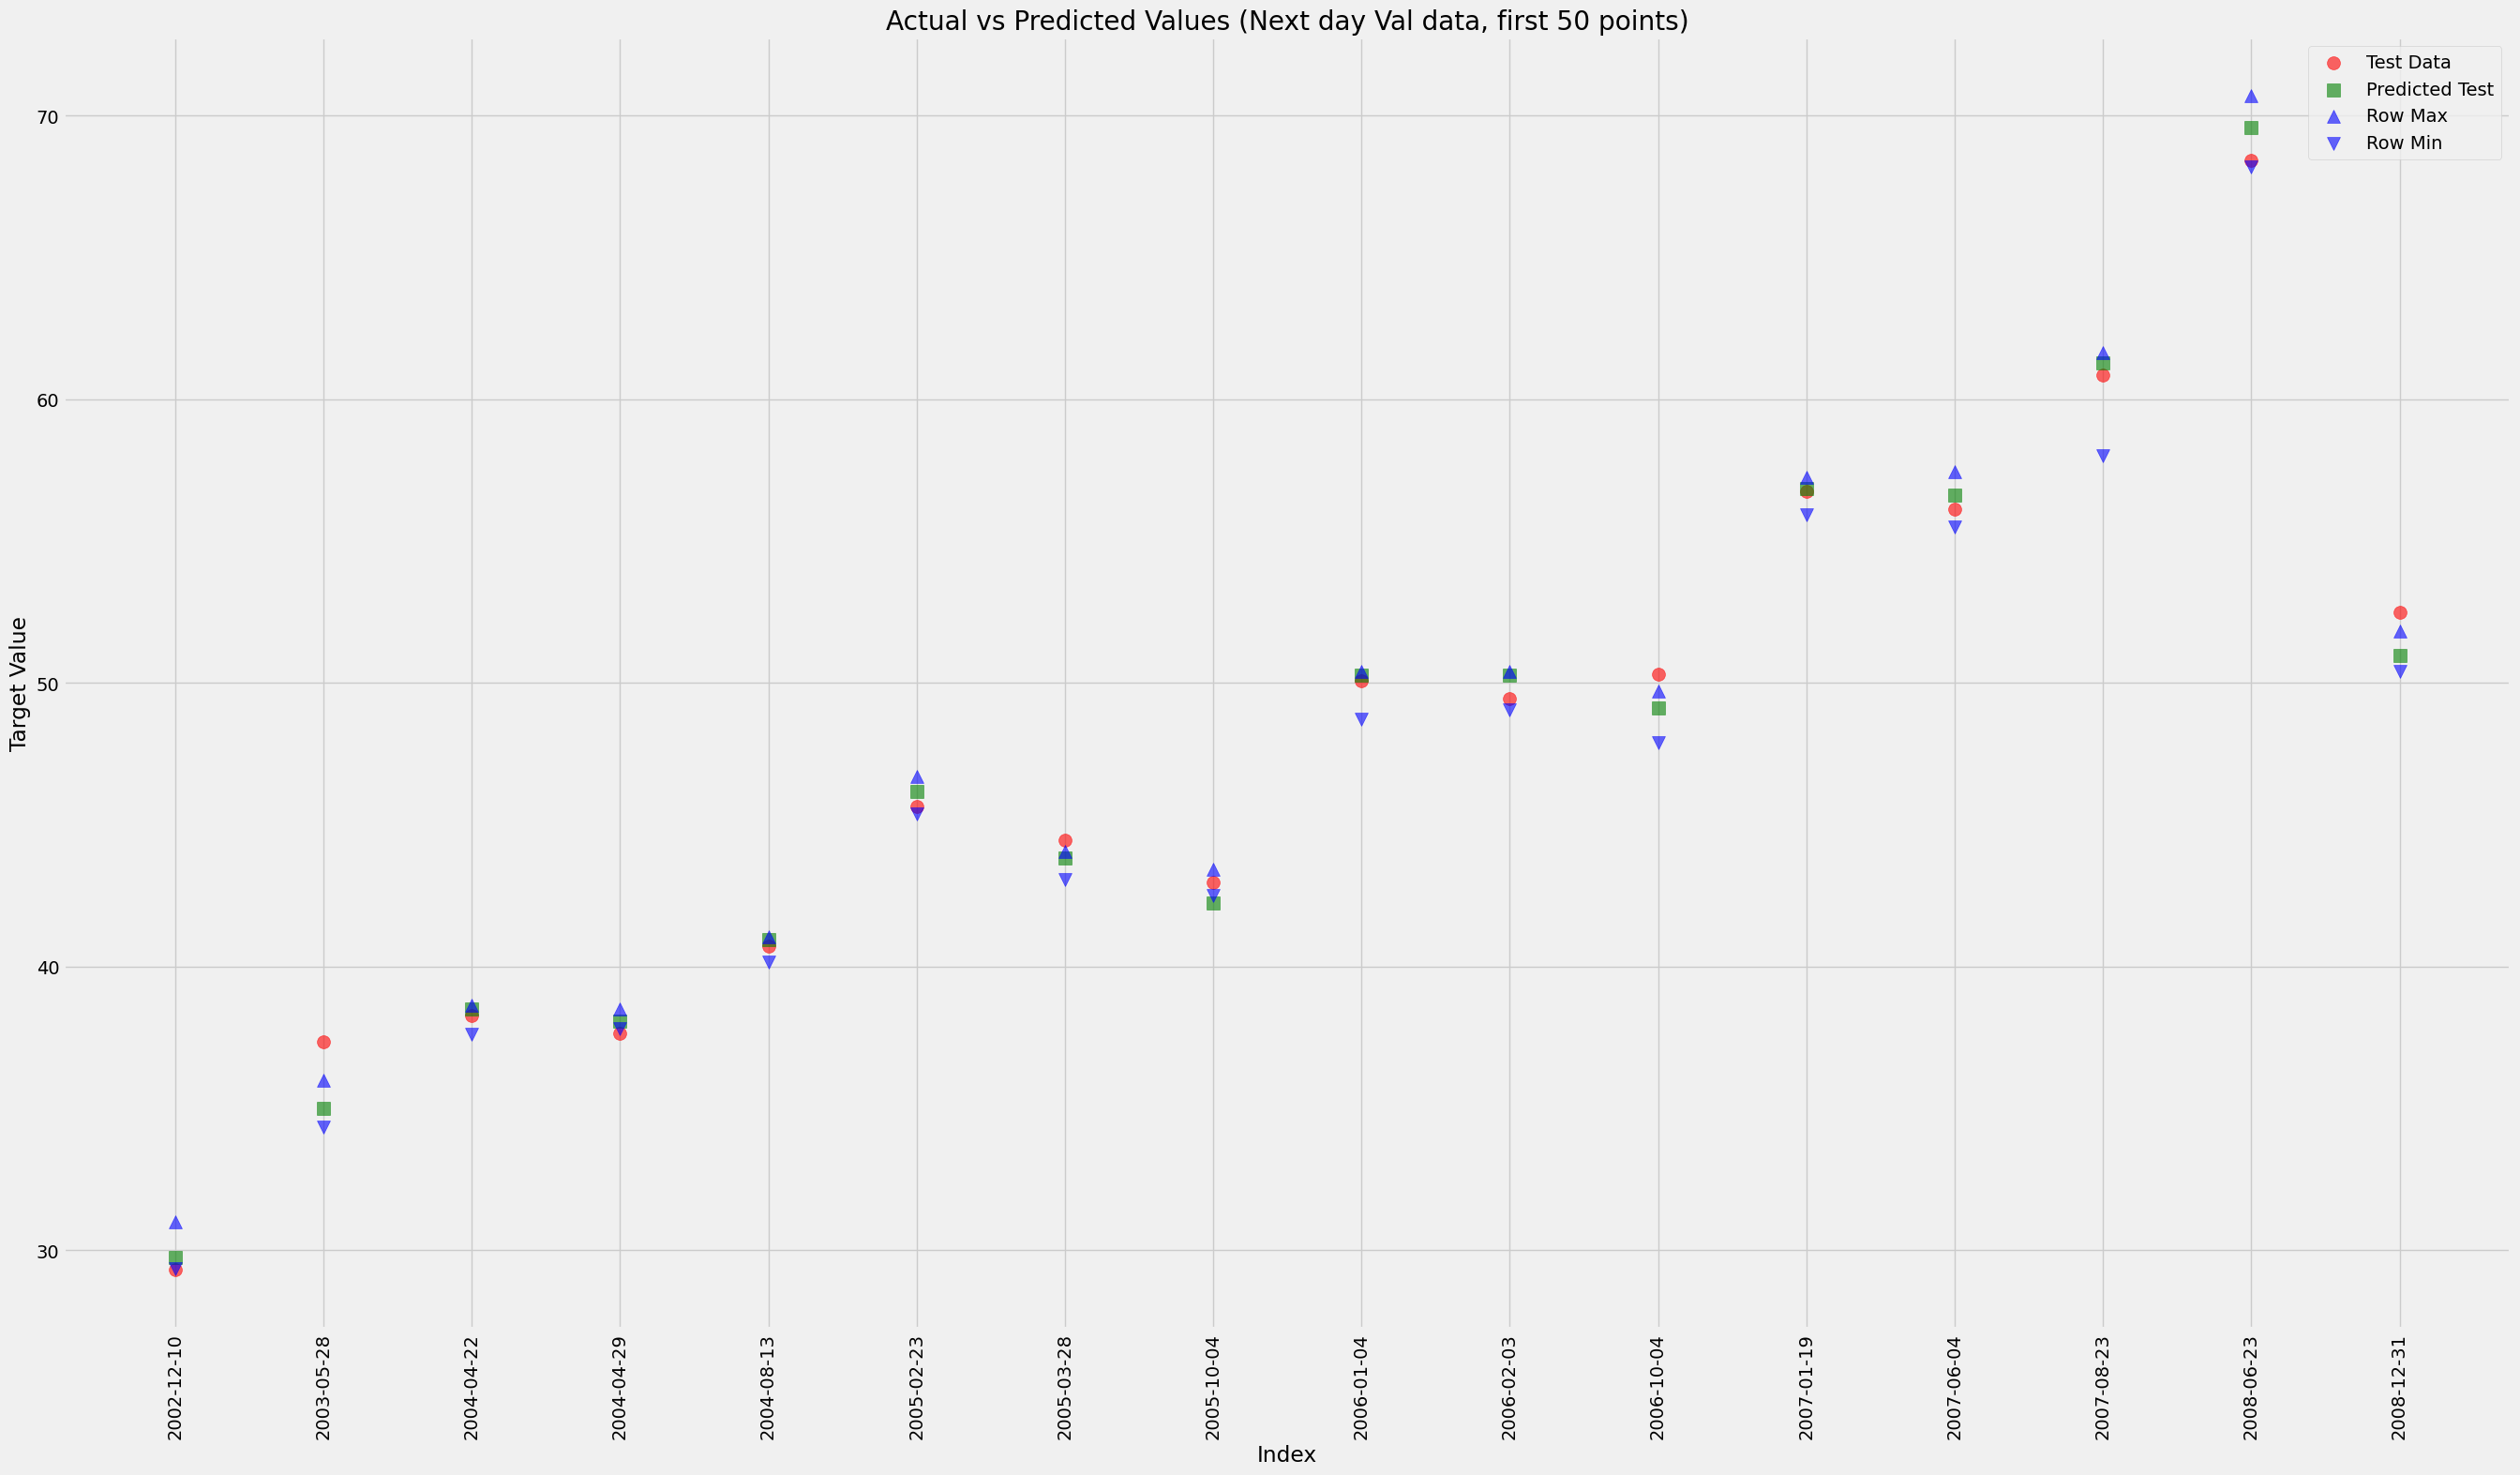

In [ ]:
# Convert y_test_pred to a Pandas Series and create an index for it
y_val_pred_series = pd.Series(y_val_pred[:50], index=X_val.iloc[:50].index)

# Create DataFrames/Series with the same index
X_val_subset = X_val.iloc[:50].sort_index()
y_val_subset = pd.Series(y_val[:50], index=X_val_subset.index).sort_index()
y_val_pred_subset = y_val_pred_series.sort_index()

# Extract Row_Max and Row_Min for plotting
row_max_subset = X_val_subset['Row_Max']
row_min_subset = X_val_subset['Row_Min']

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_val_subset.index[0:16], y_val_subset[0:16], color='red', label='Test Data', alpha=0.6, marker='o',s=100)
plt.scatter(X_val_subset.index[0:16], y_val_pred_subset[0:16], color='green', label='Predicted Test', alpha=0.6, marker='s',s=100)
plt.scatter(X_val_subset.index[0:16], row_max_subset[0:16], color='blue', label='Row Max', alpha=0.6, marker='^',s=100)
plt.scatter(X_val_subset.index[0:16], row_min_subset[0:16], color='blue', label='Row Min', alpha=0.6, marker='v',s=100)
plt.title('Actual vs Predicted Values (Next day Val data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
paired_data_50 = pd.DataFrame({
    'Actual': y_val_subset,
    'Predicted': y_val_pred_subset,
    'Max': X_val['Row_Max'].iloc[:50],
    'Min': X_val['Row_Min'].iloc[:50]
})
paired_data_50

,Actual,Predicted,Max,Min
Date,,,,
2002-12-10,29.320000,29.738626,31.000000,29.350000
2003-05-28,37.349998,35.012943,35.990002,34.349998
2004-04-22,38.290001,38.493042,38.630001,37.610001
2004-04-29,37.660000,38.083496,38.500000,37.830002
2004-08-13,40.730000,40.958408,41.049999,40.160000
2005-02-23,45.650002,46.171593,46.709999,45.400002
2005-03-28,44.450001,43.846222,44.070000,43.060001
2005-10-04,42.970001,42.247074,43.450001,42.500000
2006-01-04,50.080002,50.263245,50.400002,48.740002


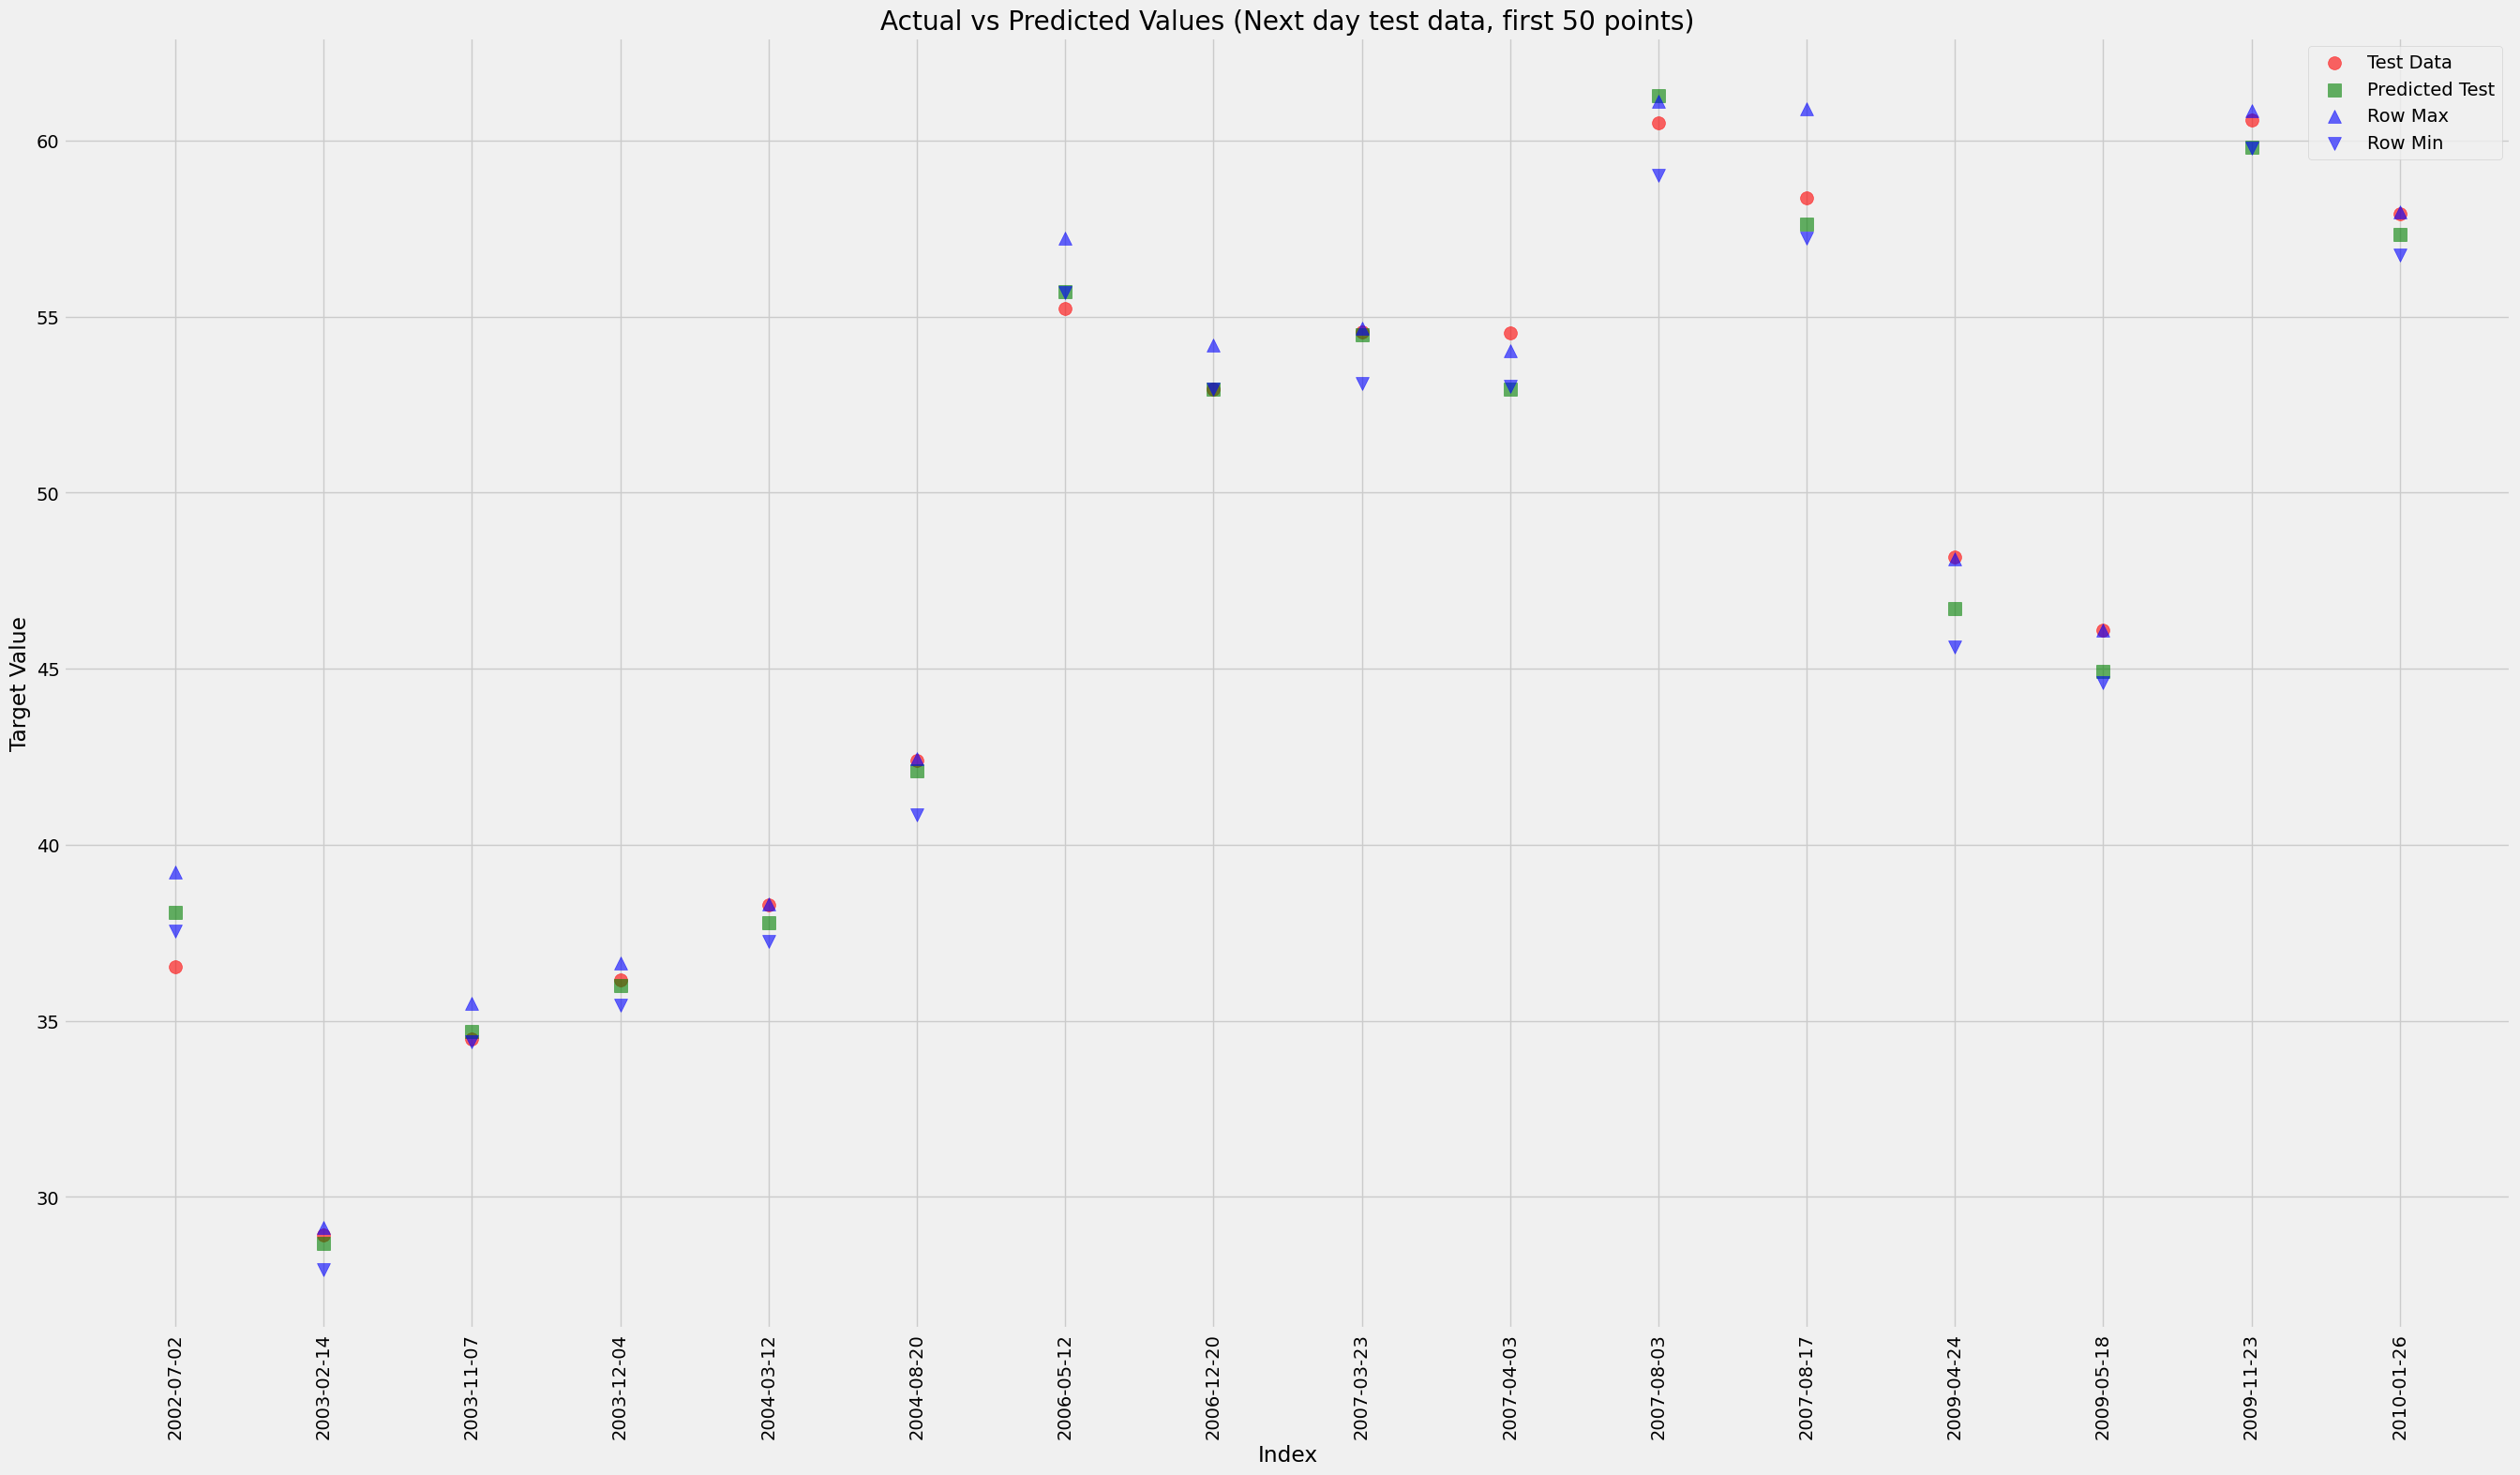

In [ ]:
# Convert y_test_pred to a Pandas Series and create an index for it
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Create DataFrames/Series with the same index
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Extract Row_Max and Row_Min for plotting
row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[0:16], y_test_subset[0:16], color='red', label='Test Data', alpha=0.6, marker='o',s=100)
plt.scatter(X_test_subset.index[0:16], y_test_pred_subset[0:16], color='green', label='Predicted Test', alpha=0.6, marker='s',s=100)
plt.scatter(X_test_subset.index[0:16], row_max_subset[0:16], color='blue', label='Row Max', alpha=0.6, marker='^',s=100)
plt.scatter(X_test_subset.index[0:16], row_min_subset[0:16], color='blue', label='Row Min', alpha=0.6, marker='v',s=100)
plt.title('Actual vs Predicted Values (Next day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
paired_data_50 = pd.DataFrame({
    'Actual': y_test_subset,
    'Predicted': y_test_pred_subset,
    'Max': X_test['Row_Max'].iloc[:50],
    'Min': X_test['Row_Min'].iloc[:50]
})
paired_data_50

,Actual,Predicted,Max,Min
Date,,,,
2002-07-02,36.520000,38.083496,39.220001,37.549999
2003-02-14,28.920000,28.666405,29.120001,27.930000
2003-11-07,34.490002,34.707485,35.500000,34.400002
2003-12-04,36.169998,35.988010,36.639999,35.439999
2004-03-12,38.299999,37.791782,38.330002,37.250000
2004-08-20,42.400002,42.090260,42.450001,40.860001
2006-05-12,55.230000,55.697754,57.240002,55.680000
2006-12-20,52.930000,52.933926,54.189999,52.950001
2007-03-23,54.560001,54.486504,54.660000,53.090000
